In [5]:
from google.colab import files


uploaded = files.upload()

Saving indian_liver_patient.csv to indian_liver_patient.csv


Import Libraries

In [3]:
# for numerical computing
import numpy as np

# for dataframes
import pandas as pd

# for easier visualization
import seaborn as sns

# for visualization and to display plots
from matplotlib import pyplot as plt
%matplotlib inline

# import color maps
from matplotlib.colors import ListedColormap

# Ignore Warnings
import warnings
warnings.filterwarnings("ignore")

from math import sqrt

# to split train and test set
from sklearn.model_selection import train_test_split

# to perform hyperparameter tuning
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from sklearn.model_selection import cross_val_score

# Machine Learning Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc, roc_auc_score, confusion_matrix

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from matplotlib.colors import ListedColormap
from sklearn.metrics import accuracy_score
#import xgboost
import os
mingw_path = 'C:\\Program Files\\mingw-w64\\x86_64-7.2.0-posix-seh-rt_v5-rev0\\mingw64\\bin'
os.environ['PATH'] = mingw_path + ';' + os.environ['PATH']
from xgboost import XGBClassifier
from xgboost import plot_importance  # to plot feature importance

import joblib

Read Data Set

In [6]:
import io
df = pd.read_csv(io.BytesIO(uploaded['indian_liver_patient.csv']))
df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


Exploratory OF Data Analysis

In [7]:
df.dtypes[df.dtypes=='object']

Gender    object
dtype: object

Handle Null Values

In [10]:
df.isnull().sum()
df.fillna(0)

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
578,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,2
579,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,1


Data Visualization

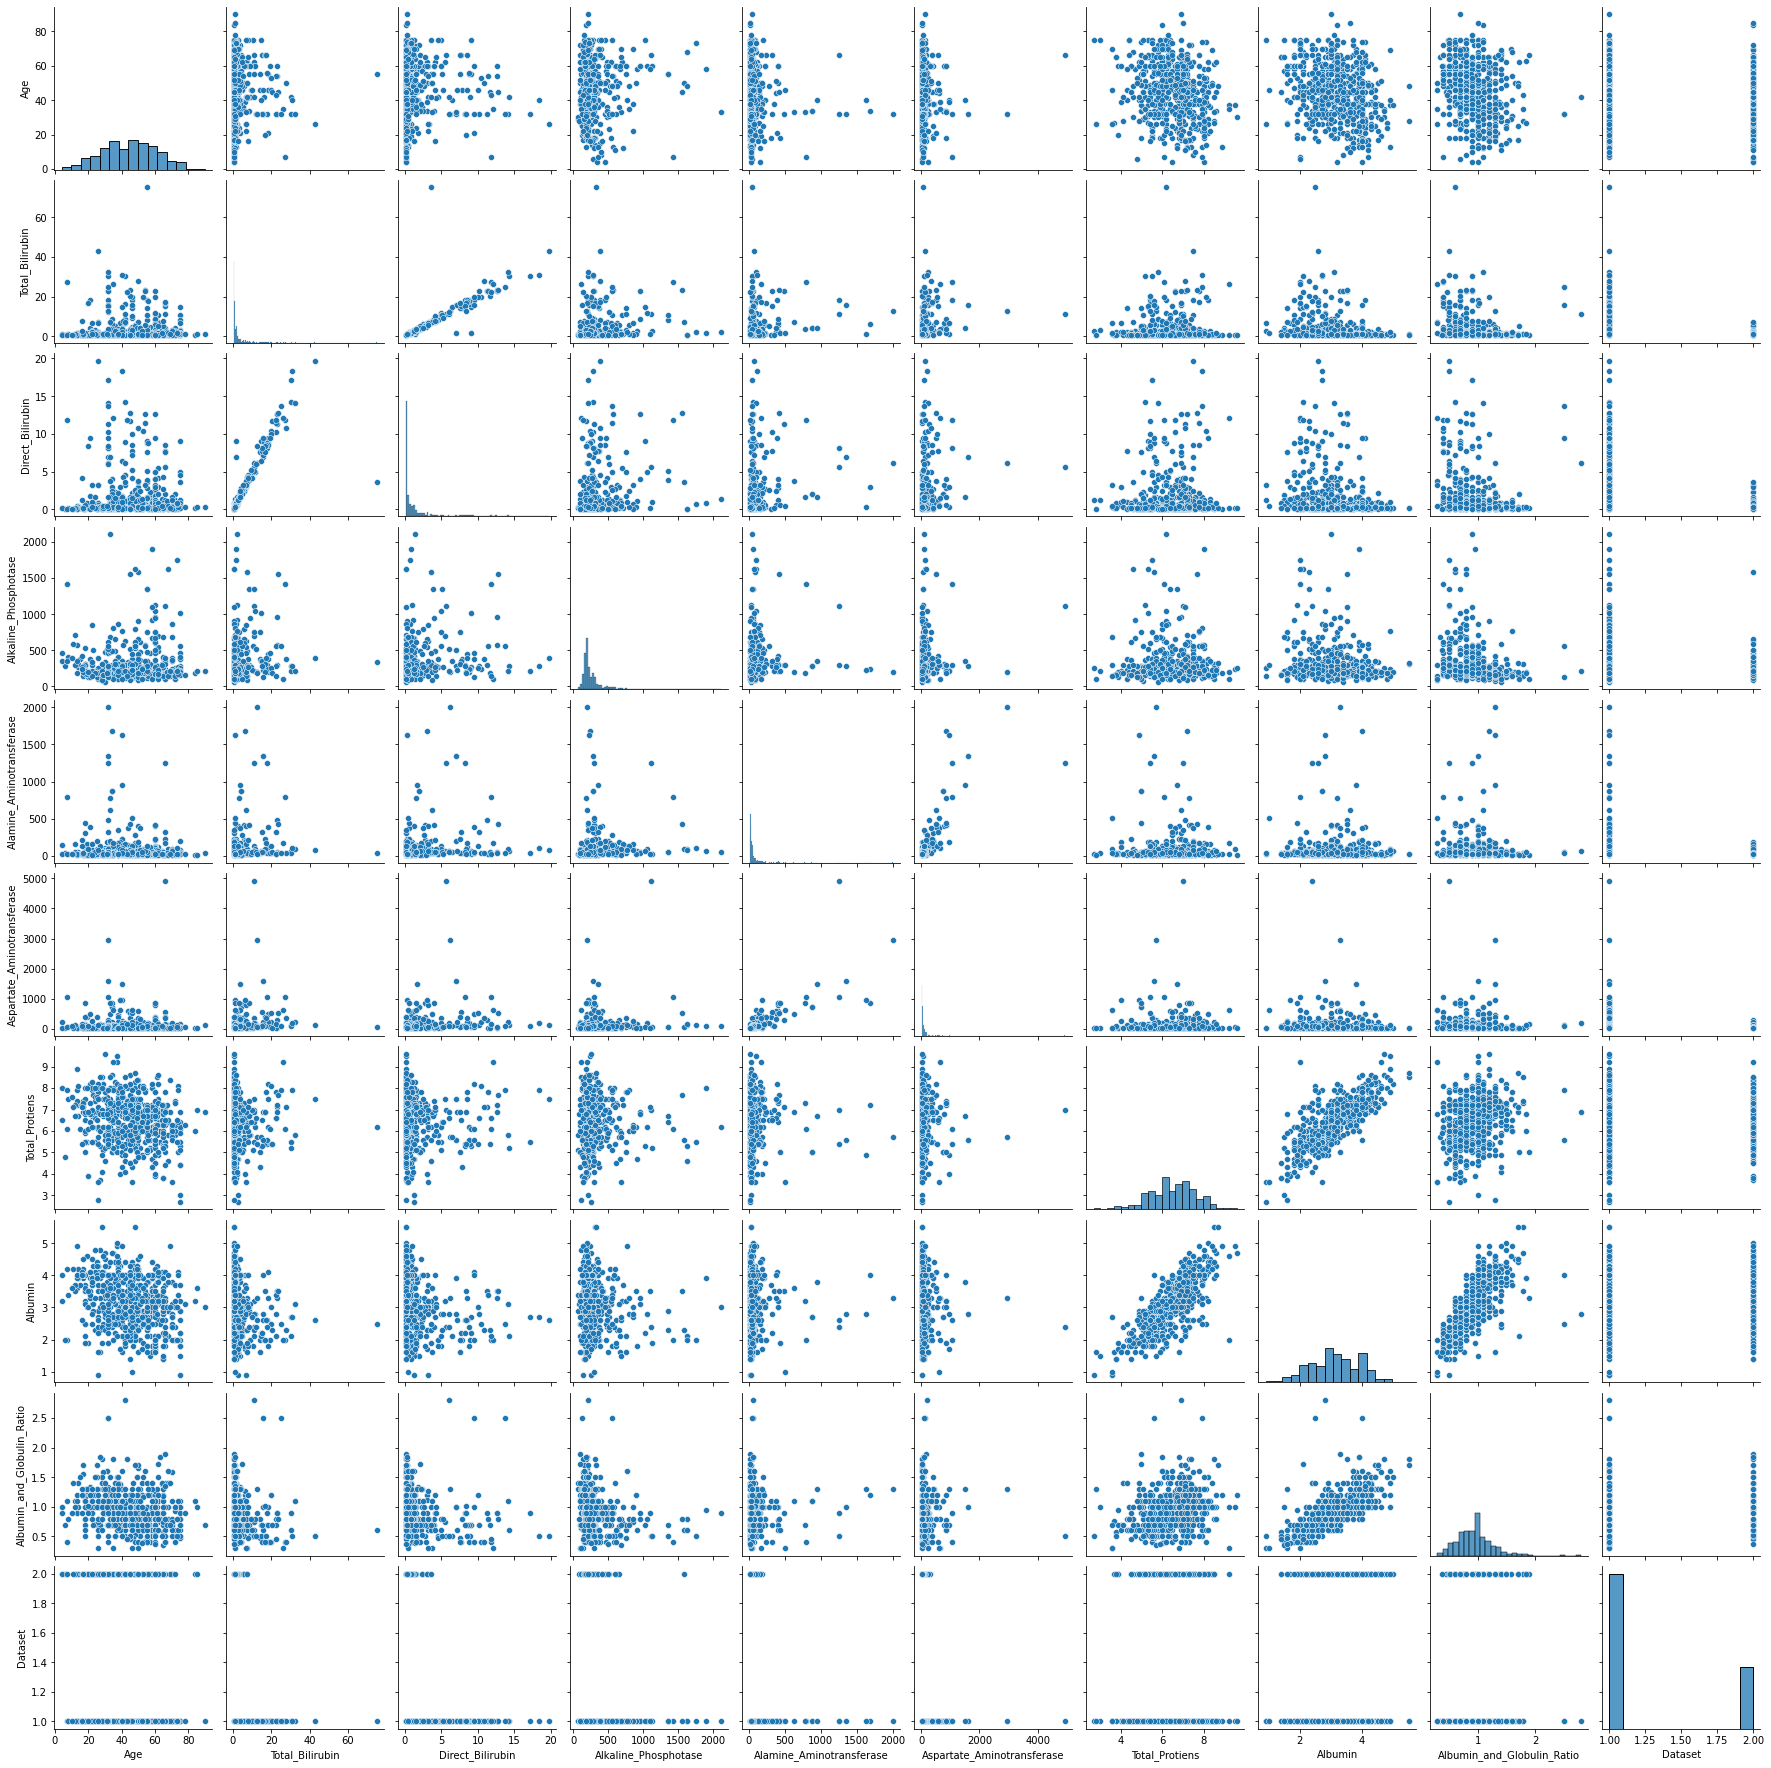

In [12]:
# pairplot

sns.pairplot(df)

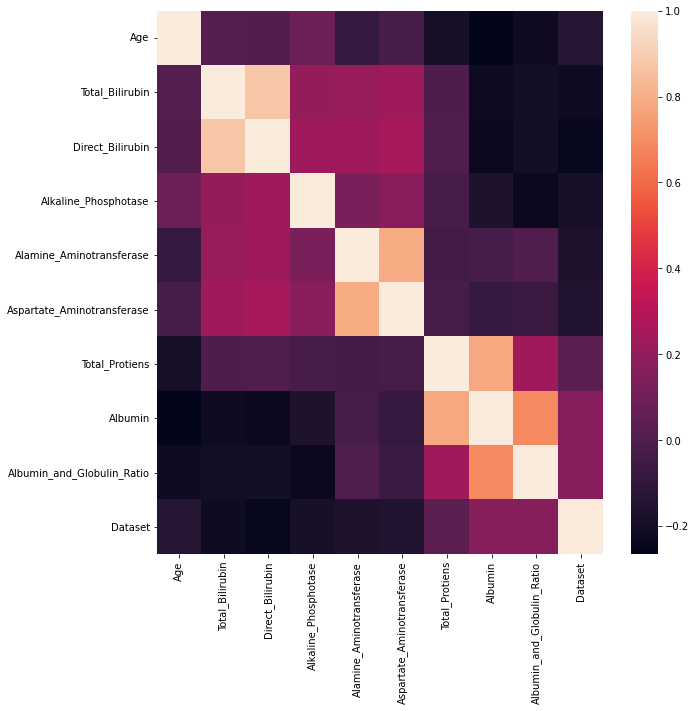

In [13]:
#heat map
plt.figure(figsize=(10,10))
sns.heatmap(df.corr())

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f68db996710>,
      dtype=object)

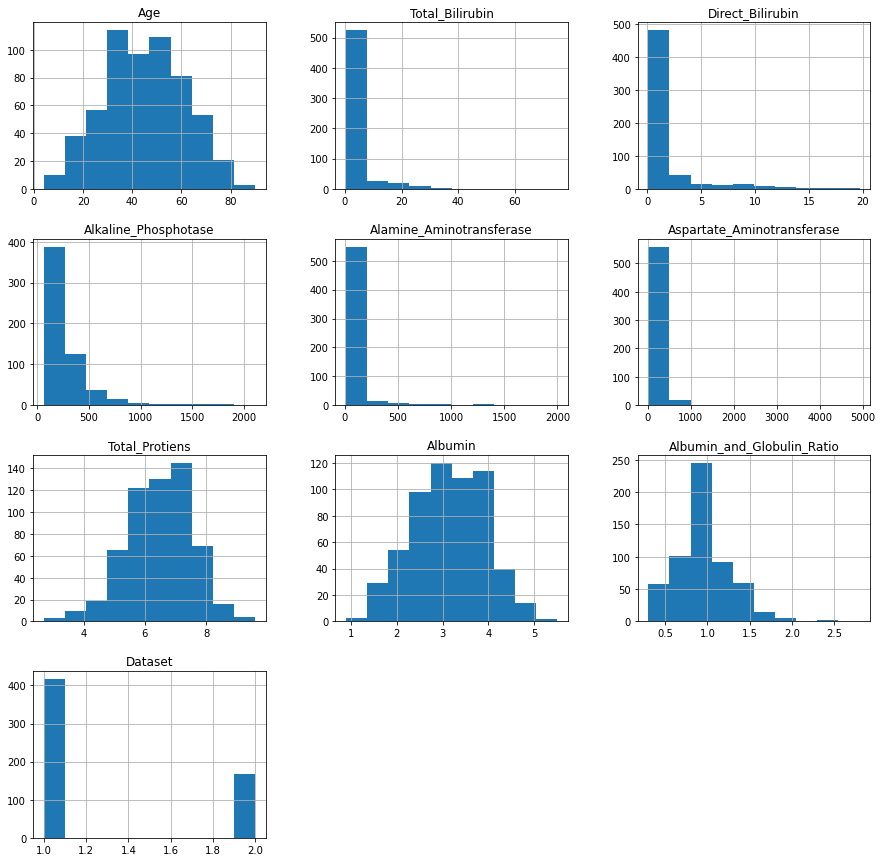

In [15]:
# Plot histogram grid
df.hist(figsize=(15,15))

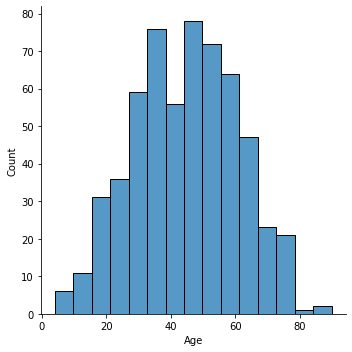

In [16]:
#univarient analysis of Age
sns.displot(df['Age'])

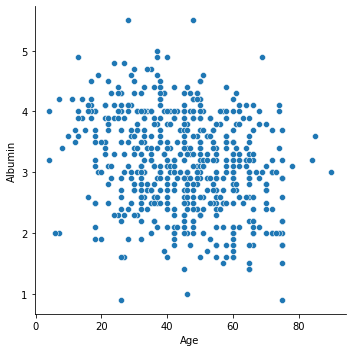

In [17]:
#Bi varient analysis
sns.relplot(x="Age",y="Albumin",data=df)

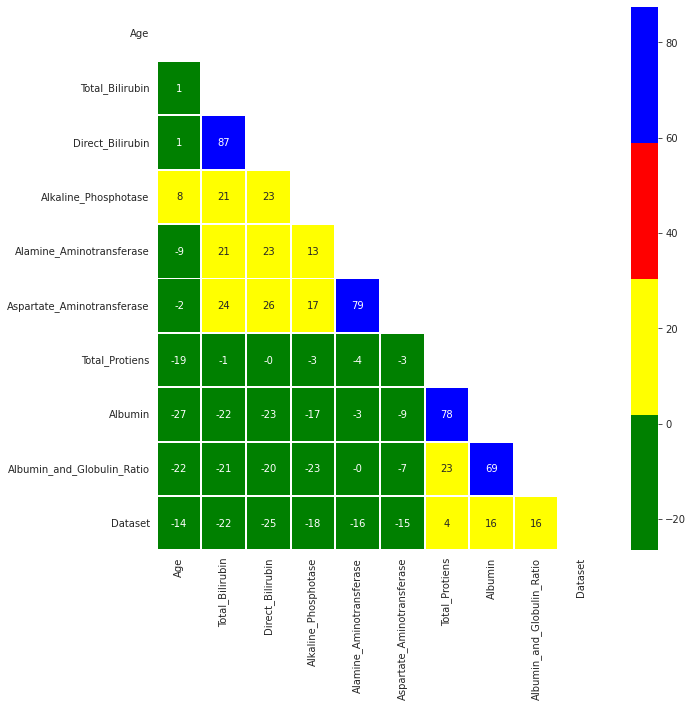

In [18]:
mask=np.zeros_like(df.corr())
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(10,10))
with sns.axes_style("white"):
    ax = sns.heatmap(df.corr()*100, mask=mask, fmt='.0f', annot=True, lw=1, cmap=ListedColormap(['green', 'yellow', 'red','blue']))

splitting the dependent and independent variables

In [20]:
#Splitting the Dataset into the Independent
X = df.iloc[:, :-1].values
print(X)

[[65 'Female' 0.7 ... 6.8 3.3 0.9]
 [62 'Male' 10.9 ... 7.5 3.2 0.74]
 [62 'Male' 7.3 ... 7.0 3.3 0.89]
 ...
 [52 'Male' 0.8 ... 6.4 3.2 1.0]
 [31 'Male' 1.3 ... 6.8 3.4 1.0]
 [38 'Male' 1.0 ... 7.3 4.4 1.5]]


In [21]:
#Extracting the Dataset to Get the Dependent Vector
Y = df.iloc[:, -1].values
print(Y)

[1 1 1 1 1 1 1 1 2 1 1 1 2 1 1 2 1 2 1 1 1 1 1 1 2 1 1 1 2 2 1 1 2 2 2 1 2
 1 1 1 1 2 2 1 2 2 1 1 1 1 1 1 1 1 1 1 2 2 1 2 1 1 1 1 1 1 1 1 1 2 1 1 1 1
 1 2 1 1 2 1 1 1 2 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 1 2 1 2 2 2 2 2 2
 1 2 1 2 2 1 1 1 1 1 1 2 1 2 2 1 1 1 1 1 2 2 1 1 1 1 1 1 1 2 1 1 1 1 2 1 1
 1 1 2 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1
 2 1 1 1 2 1 1 1 2 2 1 1 1 2 1 1 1 2 2 2 1 1 1 1 1 1 1 2 1 1 2 2 1 2 1 1 1
 1 2 1 1 1 1 2 1 2 1 1 1 1 1 2 1 2 1 2 1 1 1 1 1 1 1 1 1 1 1 2 2 2 1 1 1 2
 1 1 1 1 1 2 2 1 1 1 1 1 2 1 1 1 2 2 1 1 1 1 2 1 2 1 1 1 2 1 1 1 2 1 2 1 1
 1 2 1 2 2 1 1 2 1 2 1 1 1 1 1 1 2 2 1 2 2 1 1 2 1 1 1 2 1 2 2 2 2 2 1 1 1
 2 1 1 1 1 1 1 1 1 2 1 2 1 1 1 1 2 1 1 1 1 1 2 1 1 1 2 1 2 2 2 2 2 2 2 1 1
 1 2 1 2 2 1 1 2 1 2 1 1 1 2 1 1 2 1 1 1 1 1 1 1 1 2 1 1 1 1 2 1 1 2 1 1 2
 1 1 1 1 2 1 2 2 1 1 2 1 1 1 2 1 2 1 1 2 1 2 1 1 2 1 2 2 2 1 1 1 1 1 1 1 1
 2 2 1 1 1 1 1 1 1 1 2 1 2 2 1 1 1 1 1 1 2 2 2 2 1 1 1 2 2 2 2 2 1 1 1 1 2
 1 1 2 1 1 1 1 2 2 1 2 1 

In [25]:
# Split X and y into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, 
                                                    test_size=0.2, 
                                                    random_state=1234,
                                                    stratify=df.Dataset)

In [26]:
# Print number of observations in X_train, X_test, y_train, and y_test
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(466, 10) (117, 10) (466,) (117,)
